In [19]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [68]:
#Import Data
path = r'C:\Users\eog87\Desktop\Data Analytics\2. Data Immersion\4. Python Fundamentals for Data Analysts\Instacart Basket Analysis'

# ORIGINAL DATA
df_products = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'products.csv'))
df_orders_products_prior = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'orders_products_prior.csv'))
df_orders = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'orders.csv'))
df_departments = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'))
df_customers = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'))

# PREPARED DATA
df_departments_wrangled = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))
df_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final.pkl'))
df_final_ex10 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final_ex10.pkl'))
df_orders_clean = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'orders_clean.csv'))
df_orders_wrangled = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'orders_wrangled.csv'))
df_products_clean = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'products_clean.csv'))
df_orders_product_combined = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_combined.pkl'))
df_orders_product_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_prods_merge.pkl'))
df_final_with_departments = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final_with_departments.pkl'))

In [6]:
df_orders.shape

(3421083, 7)

In [7]:
df_orders_wrangled.shape

(3421083, 7)

In [8]:
df_orders_products_prior.shape

(32434489, 4)

In [9]:
df_products.shape

(49693, 5)

In [10]:
df_products_clean.shape

(49672, 6)

In [11]:
df_customers.shape

(206209, 10)

In [16]:
df_orders_product_combined.shape

(32434489, 11)

In [15]:
df_orders_product_merge.shape

(32404859, 14)

In [18]:
pd.set_option('display.max_columns', None)
df_final

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,add_to_cart_order,reordered,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,avg_price_purchases,median_days_between_orders,order_frequency,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,26711,28,6,11,3.0,5,0,Mid-range product,Mid-range product,Regularly busy,Regular Days,Most orders,32,Regular customer,Low spender,6.935811,8.0,Frequent customer,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,33890,30,6,17,20.0,1,1,Mid-range product,Mid-range product,Regularly busy,Regular Days,Average orders,32,Regular customer,Low spender,6.935811,8.0,Frequent customer,Patricia,Hart,Female,New Mexico,36,2017-01-01,0,single,59285,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,65803,2,0,21,6.0,20,0,Mid-range product,Mid-range product,Busiest day,Busiest Days,Average orders,5,New customer,Low spender,7.930208,8.0,Frequent customer,Kenneth,Farley,Male,Idaho,35,2017-01-01,2,married,99568,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,125935,1,3,13,NaN,10,0,Mid-range product,Mid-range product,Regularly busy,Slowest Days,Most orders,3,New customer,Low spender,4.972414,9.0,Frequent customer,Michelle,Hicks,Female,Iowa,40,2017-01-01,0,single,42049,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,130797,3,4,17,9.0,11,1,Mid-range product,Mid-range product,Least busy,Slowest Days,Average orders,3,New customer,Low spender,4.972414,9.0,Frequent customer,Ann,Gilmore,Female,Maryland,26,2017-01-01,1,married,40374,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,300,Organic Enriched Unbleached White Flour,17,13,3.7,2105642,168073,4,4,12,2.0,20,0,Low-range product,Low-range product,Least busy,Slowest Days,Most orders,25,Regular customer,Low spender,9.051505,5.0,Frequent customer,Lisa,Case,Female,North Carolina,44,2020-04-01,1,married,148828,both
206205,300,Organic Enriched Unbleached White Flour,17,13,3.7,2979863,49635,6,0,17,3.0,9,0,Low-range product,Low-range product,Busiest day,Busiest Days,Average orders,15,Regular customer,Low spender,8.251256,4.0,Frequent customer,Jeremy,Robbins,Male,Hawaii,62,2020-04-01,3,married,168639,both
206206,300,Organic Enriched Unbleached White Flour,17,13,3.7,1258582,135902,14,1,10,5.0,3,1,Low-range product,Low-range product,Regularly busy,Busiest Days,Most orders,15,Regular customer,Low spender,8.251256,4.0,Frequent customer,Doris,Richmond,Female,Missouri,66,2020-04-01,2,married,53374,both
206207,300,Organic Enriched Unbleached White Flour,17,13,3.7,1093020,81095,11,1,9,24.0,11,0,Low-range product,Low-range product,Regularly busy,Busiest Days,Average orders,11,Regular customer,Low spender,8.302778,18.0,Regular customer,Rose,Rollins,Female,California,27,2020-04-01,1,married,99799,both


In [180]:
df_final = df_final.drop(columns=['first_name', 'last_name','date_joined', 'aisle_id', '_merge'])

([<matplotlib.axis.XTick at 0x1f9864a5710>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

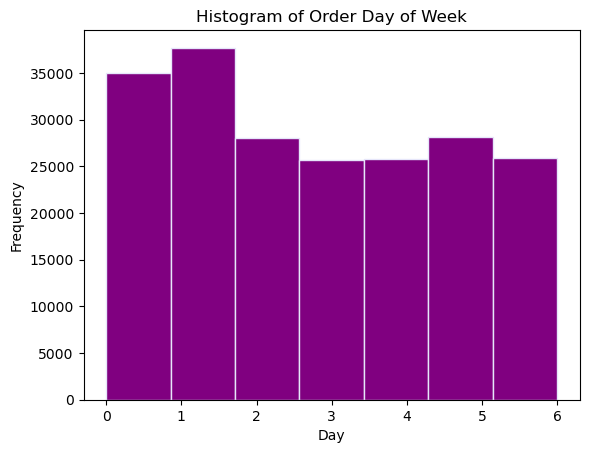

In [27]:
# Busiest day of week
barchart_busiest_days = df_final['order_day_of_week'].plot.hist(bins=7, color='purple',edgecolor='lavender')
plt.title('Histogram of Order Day of Week')
plt.ylabel('Frequency')
plt.xlabel('Day')
plt.xticks(np.arange(0,7,1))

In [32]:
barchart_busiest_days.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '2_barchart_busiest_days.png'))

In [ ]:
# 3. time of the day when people spend more money

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eog87\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([<matplotlib.axis.XTick at 0x1f988ed9e50>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

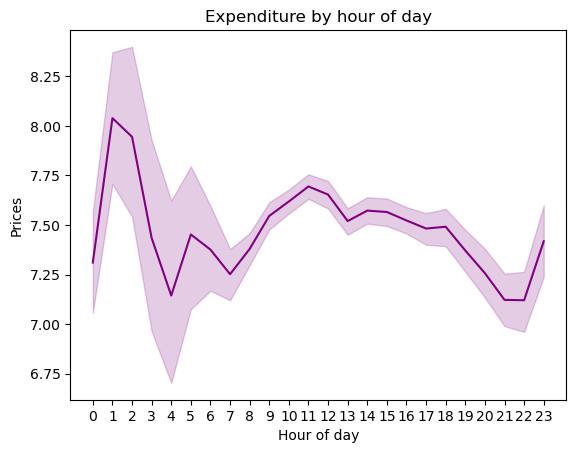

In [42]:
linechart_time_of_day_expenditure = sns.lineplot(data = df_final,x = 'order_hour_of_day', y = 'prices', color = 'purple')
plt.title('Expenditure by hour of day')
plt.ylabel('Prices')
plt.xlabel('Hour of day')
plt.xticks(np.arange(0,24,1))

In [43]:
linechart_time_of_day_expenditure.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '2_linechart_time_of_day_expenditure.png'))

In [ ]:
# 3. Price distribution and groups

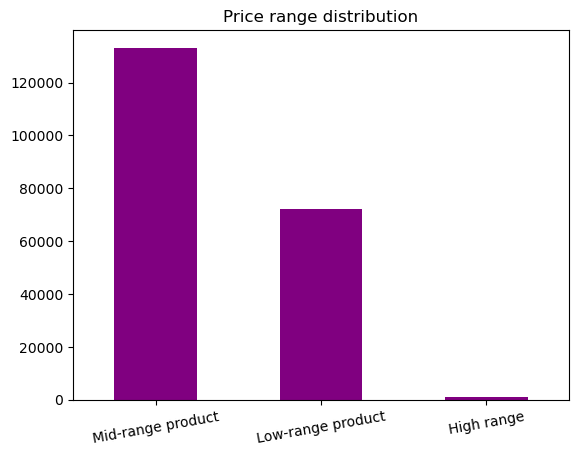

In [38]:
barchart_price_distribution = df_final['price_range'].value_counts().plot.bar(color='purple')
plt.title('Price range distribution')
plt.ylabel('')
plt.xlabel('')
plt.tick_params(axis='x', rotation = 10)

In [39]:
barchart_price_distribution.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '2_barchart_price_distribution.png'))

In [ ]:
# 4. departments and products

In [71]:
df_department_orders_barchart = df_final_with_departments.groupby(['department'], as_index=False).agg({'order_id': 'count'})

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


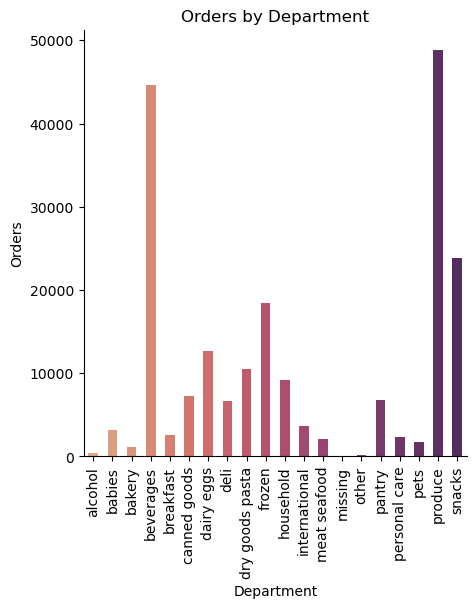

In [73]:
department_orders_barchart = sns.catplot(data=df_department_orders_barchart, kind="bar", x="department", y="order_id", 
                                         palette="flare", width = 0.5)
plt.title("Orders by Department")
department_orders_barchart.set_axis_labels("Department", "Orders")
department_orders_barchart.tick_params(axis='x', rotation=90)

In [75]:
department_orders_barchart.savefig(os.path.join(path, '04 Analysis','Visualizations', '2_department_orders_barchart.png'))

In [76]:
df_department_revenue_barchart = df_final_with_departments.groupby(['department'], as_index=False).agg({'prices': 'sum'})

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


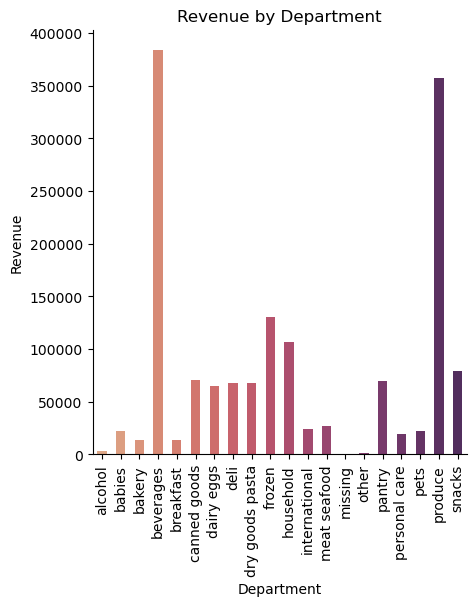

In [81]:
department_revenue_barchart = sns.catplot(data=df_department_revenue_barchart, kind="bar", x="department", y="prices", 
                                         palette="flare", width = 0.5)
plt.title("Revenue by Department")
department_revenue_barchart.set_axis_labels("Department", "Revenue")
department_revenue_barchart.tick_params(axis='x', rotation = 90)

In [82]:
department_revenue_barchart.savefig(os.path.join(path, '04 Analysis','Visualizations', '2_department_revenue_barchart.png'))

In [ ]:
#4. Loyalty distribution

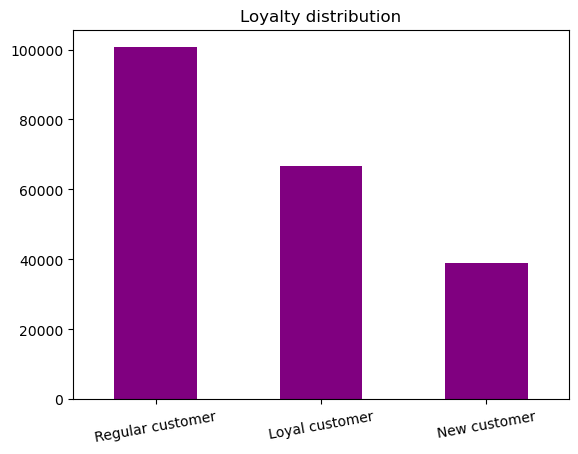

In [104]:
barchart_loyalty_distribution = df_final['loyalty_flag'].value_counts().plot.bar(color='purple')
plt.title('Loyalty distribution')
plt.ylabel('')
plt.xlabel('')
plt.tick_params(axis='x', rotation = 10)

In [105]:
barchart_loyalty_distribution.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '2_barchart_loyalty_distribution.png'))

In [ ]:
# 5. Differences in ordering habits based on customer's loyalty status

In [111]:
loyalty_spending = df_final.groupby(['loyalty_flag', 'spending_flag'], as_index=False).agg({'user_id': 'nunique'})

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


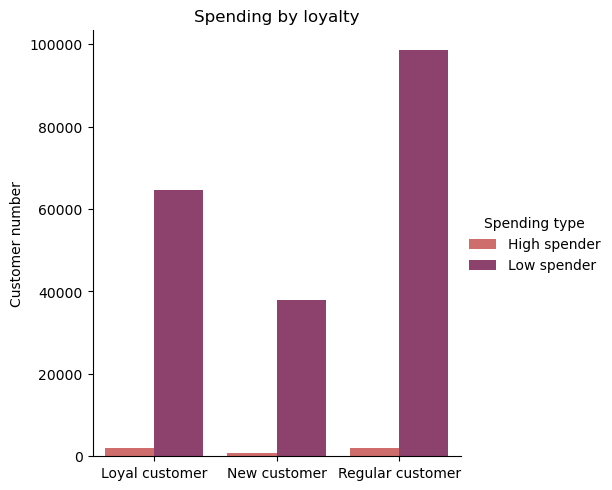

In [114]:
barchart_spending_vs_loyalty = sns.catplot(data=loyalty_spending, kind="bar", x="loyalty_flag", y="user_id", 
                                             hue="spending_flag", palette="flare")
plt.title("Spending by loyalty")
barchart_spending_vs_loyalty.set_axis_labels("", "Customer number")
barchart_spending_vs_loyalty.legend.set_title("Spending type")

In [115]:
barchart_spending_vs_loyalty.savefig(os.path.join(path, '04 Analysis','Visualizations', '2_barchart_spending_vs_loyalty.png'))

In [120]:
loyalty_spending = df_final.groupby(['loyalty_flag', 'order_frequency'], as_index=False).agg({'user_id': 'nunique'})

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


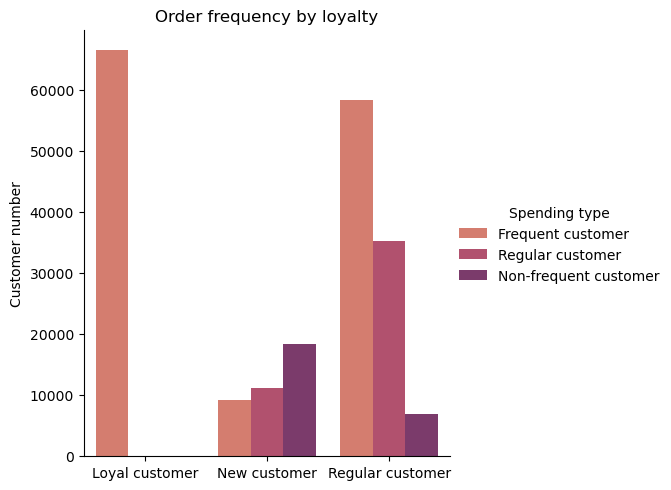

In [121]:
barchart_loyalty_vs_frequency = sns.catplot(data=loyalty_spending, kind="bar", x="loyalty_flag", y="user_id", 
                                             hue="order_frequency", palette="flare")
plt.title("Order frequency by loyalty")
barchart_loyalty_vs_frequency.set_axis_labels("", "Customer number")
barchart_loyalty_vs_frequency.legend.set_title("Spending type")

In [122]:
barchart_loyalty_vs_frequency.savefig(os.path.join(path, '04 Analysis','Visualizations', '2_barchart_loyalty_vs_frequency.png'))

In [ ]:
# 6. Brand loyalty by region

In [124]:
df_final.loc[df_final['state'].isin(["Idaho", "Montana", "Wyoming", "Nevada", "Utah", "Colorado", "Arizona", "New Mexico", 
                                     "Alaska", "Washington", "Oregon", "California", "Hawaii"]), 'region'] = "West"

df_final.loc[df_final['state'].isin(["Wisconsin", "Michigan", "Illinois", "Indiana", "Ohio", "North Dakota", "South Dakota", 
                                     "Nebraska", "Kansas", "Minnesota", "Iowa", "Missouri"]), 'region'] = "Midwest"

df_final.loc[df_final['state'].isin(["Maine","New Hampshire", "Vermont", "Massachusetts", "Rhode Island", "Connecticut", 
                                     "New York", "Pennsylvania", "New Jersey"]), 'region'] = "Northeast"

df_final.loc[df_final['state'].isin(["Delaware", "Maryland", "District of Columbia", "Virginia", "West Virginia", "Mississippi",
                                     "North Carolina", "South Carolina", "Georgia", "Florida", "Kentucky", "Tennessee", "Texas",
                                     "Alabama", "Oklahoma", "Arkansas", "Louisiana"]), 'region'] = "South"

In [125]:
loyalty_region = df_final.groupby(['loyalty_flag', 'region'], as_index=False).agg({'user_id': 'nunique'})

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


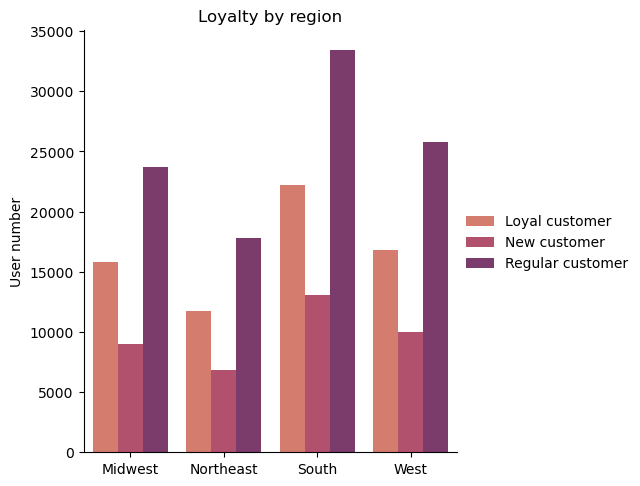

In [129]:
barchart_loyalty_region = sns.catplot(data=loyalty_region, kind="bar", x="region", y="user_id", 
                                             hue="loyalty_flag", palette="flare")
plt.title("Loyalty by region")
barchart_loyalty_region.set_axis_labels("", "User number")
barchart_loyalty_region.legend.set_title("")

In [130]:
barchart_loyalty_region.savefig(os.path.join(path, '04 Analysis','Visualizations', '2_barchart_loyalty_region.png'))

In [131]:
spending_region = df_final.groupby(['spending_flag', 'region'], as_index=False).agg({'user_id': 'nunique'})

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


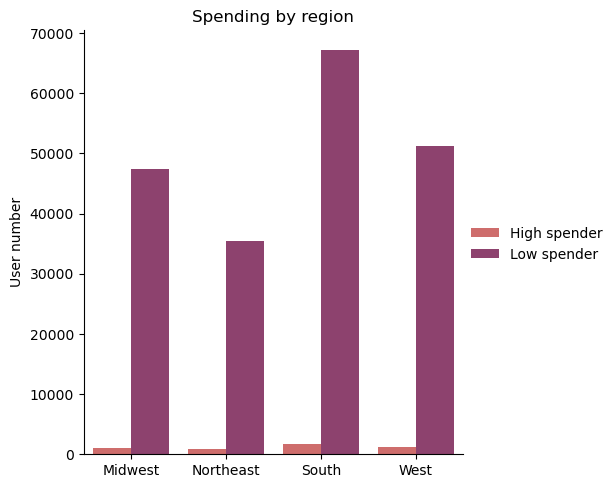

In [132]:
barchart_spending_region = sns.catplot(data=spending_region, kind="bar", x="region", y="user_id", 
                                             hue="spending_flag", palette="flare")
plt.title("Spending by region")
barchart_spending_region.set_axis_labels("", "User number")
barchart_spending_region.legend.set_title("")

In [133]:
barchart_spending_region.savefig(os.path.join(path, '04 Analysis','Visualizations', '2_barchart_spending_region.png'))

In [134]:
order_region = df_final.groupby(['order_frequency', 'region'], as_index=False).agg({'user_id': 'nunique'})

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


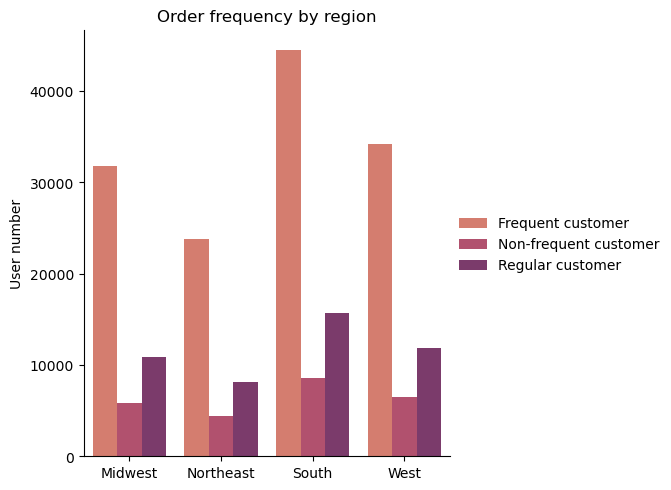

In [135]:
barchart_order_region = sns.catplot(data=order_region, kind="bar", x="region", y="user_id", 
                                             hue="order_frequency", palette="flare")
plt.title("Order frequency by region")
barchart_order_region.set_axis_labels("", "User number")
barchart_order_region.legend.set_title("")

In [136]:
barchart_order_region.savefig(os.path.join(path, '04 Analysis','Visualizations', '2_barchart_order_region.png'))

In [ ]:
# 7.ordering by age and family

In [137]:
df_final.loc[(df_final['age'] >= 18) & (df_final['age'] < 35), 'age_profile'] = 'young-adult'
df_final.loc[(df_final['age'] >= 35) & (df_final['age'] < 65), 'age_profile'] = 'adult'
df_final.loc[(df_final['age'] >= 65), 'age_profile'] = 'senior'

df_final.loc[(df_final['income'] < 50000), 'income_profile'] = 'low-income'
df_final.loc[(df_final['income'] >= 50000) & (df_final['income'] < 150000), 'income_profile'] = 'mid-income'
df_final.loc[(df_final['income'] > 150000), 'income_profile'] = 'high-income'

In [138]:
order_age_profile = df_final.groupby(['order_frequency', 'age_profile'], as_index=False).agg({'user_id': 'nunique'})

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


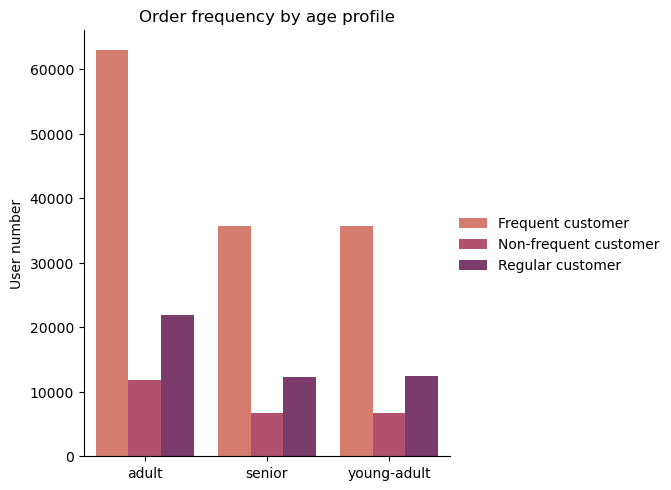

In [141]:
barchart_order_age_profile = sns.catplot(data=order_age_profile, kind="bar", x="age_profile", y="user_id", 
                                             hue="order_frequency", palette="flare")
plt.title("Order frequency by age profile")
barchart_order_age_profile.set_axis_labels("", "User number")
barchart_order_age_profile.legend.set_title("")

In [142]:
barchart_order_age_profile.savefig(os.path.join(path, '04 Analysis','Visualizations', '2_barchart_order_age_profile.png'))

In [143]:
spender_age_profile = df_final.groupby(['spending_flag', 'age_profile'], as_index=False).agg({'user_id': 'nunique'})

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


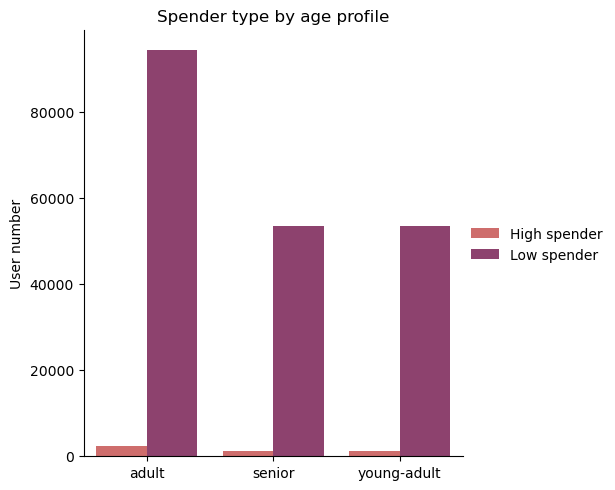

In [145]:
barchart_spender_age_profile = sns.catplot(data=spender_age_profile, kind="bar", x="age_profile", y="user_id", 
                                             hue="spending_flag", palette="flare")
plt.title("Spender type by age profile")
barchart_spender_age_profile.set_axis_labels("", "User number")
barchart_spender_age_profile.legend.set_title("")

In [146]:
barchart_spender_age_profile.savefig(os.path.join(path, '04 Analysis','Visualizations', '2_barchart_spender_age_profile.png'))

In [147]:
loyalty_age_profile = df_final.groupby(['loyalty_flag', 'age_profile'], as_index=False).agg({'user_id': 'nunique'})

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


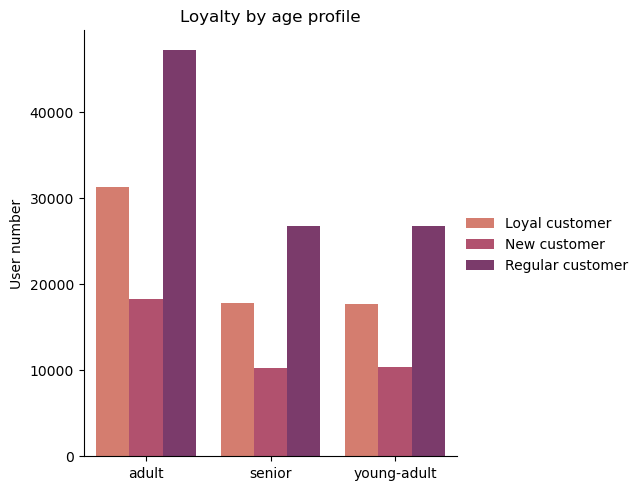

In [149]:
barchart_loyalty_age_profile = sns.catplot(data=loyalty_age_profile, kind="bar", x="age_profile", y="user_id", 
                                             hue="loyalty_flag", palette="flare")
plt.title("Loyalty by age profile")
barchart_loyalty_age_profile.set_axis_labels("", "User number")
barchart_loyalty_age_profile.legend.set_title("")

In [150]:
barchart_loyalty_age_profile.savefig(os.path.join(path, '04 Analysis','Visualizations', '2_barchart_loyalty_age_profile.png'))

In [151]:
loyalty_income_profile = df_final.groupby(['loyalty_flag', 'income_profile'], as_index=False).agg({'user_id': 'nunique'})

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


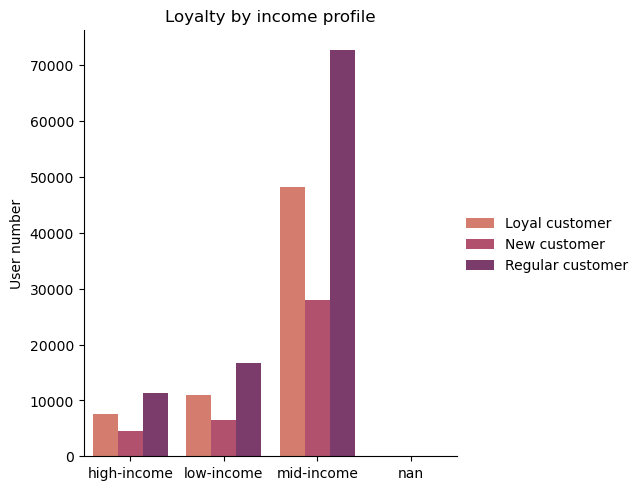

In [152]:
barchart_loyalty_income_profile = sns.catplot(data=loyalty_income_profile, kind="bar", x="income_profile", y="user_id", 
                                             hue="loyalty_flag", palette="flare")
plt.title("Loyalty by income profile")
barchart_loyalty_income_profile.set_axis_labels("", "User number")
barchart_loyalty_income_profile.legend.set_title("")

In [153]:
barchart_loyalty_income_profile.savefig(os.path.join(path, '04 Analysis','Visualizations', '2_barchart_loyalty_income_profile.png'))

In [154]:
spending_income_profile = df_final.groupby(['spending_flag', 'income_profile'], as_index=False).agg({'user_id': 'nunique'})

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


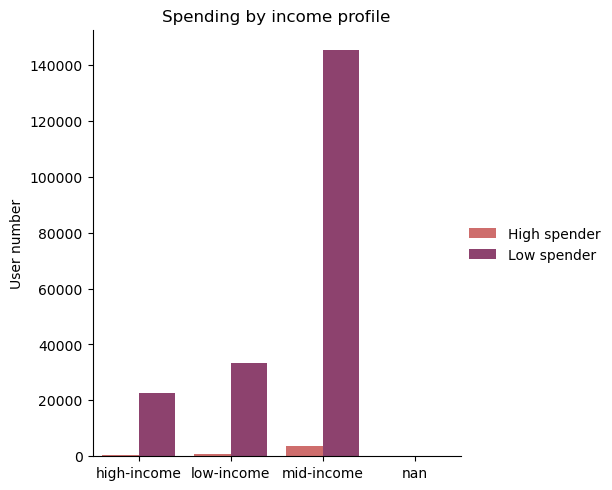

In [155]:
barchart_spending_income_profile = sns.catplot(data=spending_income_profile, kind="bar", x="income_profile", y="user_id", 
                                             hue="spending_flag", palette="flare")
plt.title("Spending by income profile")
barchart_spending_income_profile.set_axis_labels("", "User number")
barchart_spending_income_profile.legend.set_title("")

In [156]:
barchart_spending_income_profile.savefig(os.path.join(path, '04 Analysis','Visualizations', '2_barchart_spending_income_profile.png'))

In [157]:
frequency_income_profile = df_final.groupby(['order_frequency', 'income_profile'], as_index=False).agg({'user_id': 'nunique'})

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


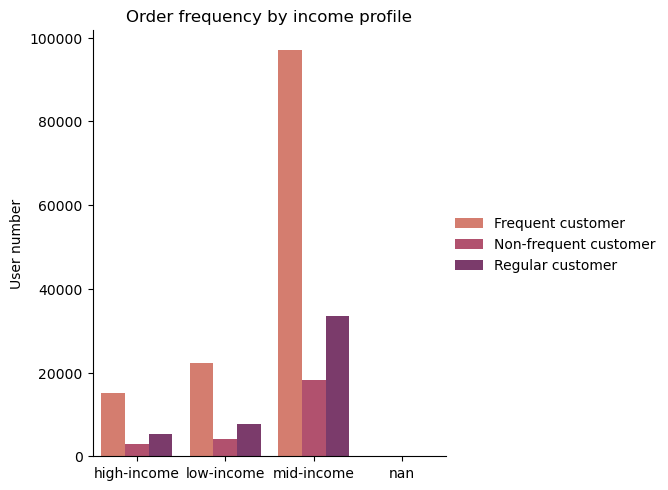

In [159]:
barchart_frequency_income_profile = sns.catplot(data=frequency_income_profile, kind="bar", x="income_profile", y="user_id", 
                                             hue="order_frequency", palette="flare")
plt.title("Order frequency by income profile")
barchart_frequency_income_profile.set_axis_labels("", "User number")
barchart_frequency_income_profile.legend.set_title("")

In [160]:
barchart_frequency_income_profile.savefig(os.path.join(path, '04 Analysis','Visualizations', '2_barchart_frequency_income_profile.png'))

In [163]:
df_final

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,add_to_cart_order,reordered,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,avg_price_purchases,median_days_between_orders,order_frequency,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income,_merge,region,age_profile,income_profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,26711,28,6,11,3.0,5,0,Mid-range product,Mid-range product,Regularly busy,Regular Days,Most orders,32,Regular customer,Low spender,6.935811,8.0,Frequent customer,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,both,Midwest,adult,high-income
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,33890,30,6,17,20.0,1,1,Mid-range product,Mid-range product,Regularly busy,Regular Days,Average orders,32,Regular customer,Low spender,6.935811,8.0,Frequent customer,Patricia,Hart,Female,New Mexico,36,2017-01-01,0,single,59285,both,West,adult,mid-income
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,65803,2,0,21,6.0,20,0,Mid-range product,Mid-range product,Busiest day,Busiest Days,Average orders,5,New customer,Low spender,7.930208,8.0,Frequent customer,Kenneth,Farley,Male,Idaho,35,2017-01-01,2,married,99568,both,West,adult,mid-income
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,125935,1,3,13,NaN,10,0,Mid-range product,Mid-range product,Regularly busy,Slowest Days,Most orders,3,New customer,Low spender,4.972414,9.0,Frequent customer,Michelle,Hicks,Female,Iowa,40,2017-01-01,0,single,42049,both,Midwest,adult,low-income
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,130797,3,4,17,9.0,11,1,Mid-range product,Mid-range product,Least busy,Slowest Days,Average orders,3,New customer,Low spender,4.972414,9.0,Frequent customer,Ann,Gilmore,Female,Maryland,26,2017-01-01,1,married,40374,both,South,young-adult,low-income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,300,Organic Enriched Unbleached White Flour,17,13,3.7,2105642,168073,4,4,12,2.0,20,0,Low-range product,Low-range product,Least busy,Slowest Days,Most orders,25,Regular customer,Low spender,9.051505,5.0,Frequent customer,Lisa,Case,Female,North Carolina,44,2020-04-01,1,married,148828,both,South,adult,mid-income
206205,300,Organic Enriched Unbleached White Flour,17,13,3.7,2979863,49635,6,0,17,3.0,9,0,Low-range product,Low-range product,Busiest day,Busiest Days,Average orders,15,Regular customer,Low spender,8.251256,4.0,Frequent customer,Jeremy,Robbins,Male,Hawaii,62,2020-04-01,3,married,168639,both,West,adult,high-income
206206,300,Organic Enriched Unbleached White Flour,17,13,3.7,1258582,135902,14,1,10,5.0,3,1,Low-range product,Low-range product,Regularly busy,Busiest Days,Most orders,15,Regular customer,Low spender,8.251256,4.0,Frequent customer,Doris,Richmond,Female,Missouri,66,2020-04-01,2,married,53374,both,Midwest,senior,mid-income
206207,300,Organic Enriched Unbleached White Flour,17,13,3.7,1093020,81095,11,1,9,24.0,11,0,Low-range product,Low-range product,Regularly busy,Busiest Days,Average orders,11,Regular customer,Low spender,8.302778,18.0,Regular customer,Rose,Rollins,Female,California,27,2020-04-01,1,married,99799,both,West,young-adult,mid-income


In [166]:
frequency_family_profile = df_final.groupby(['order_frequency', 'family_status'], as_index=False).agg({'user_id': 'nunique'})

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


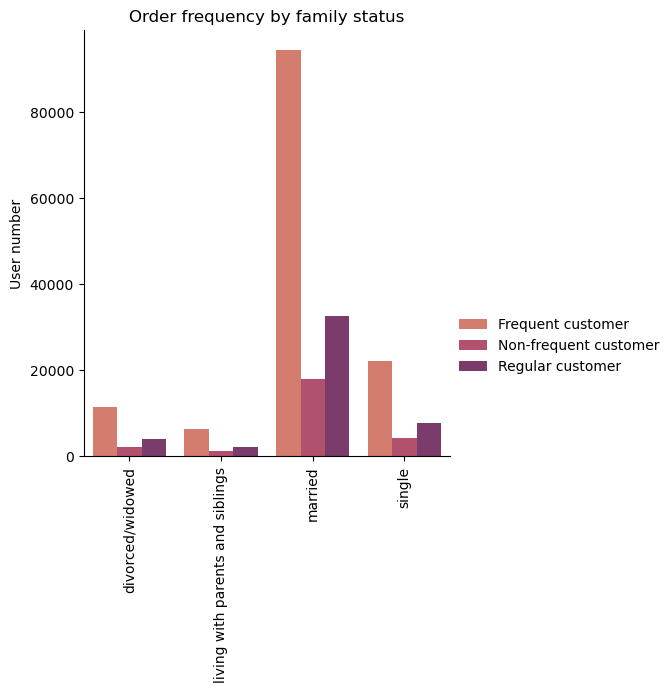

In [168]:
barchart_frequency_family_profile = sns.catplot(data=frequency_family_profile, kind="bar", x="family_status", y="user_id", 
                                             hue="order_frequency", palette="flare")
plt.title("Order frequency by family status")
barchart_frequency_family_profile.set_axis_labels("", "User number")
barchart_frequency_family_profile.legend.set_title("")
barchart_frequency_family_profile.tick_params(axis='x', rotation = 90)

In [169]:
barchart_frequency_family_profile.savefig(os.path.join(path, '04 Analysis','Visualizations', '2_barchart_frequency_family_profile.png'))

In [170]:
loyalty_family_profile = df_final.groupby(['loyalty_flag', 'family_status'], as_index=False).agg({'user_id': 'nunique'})

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


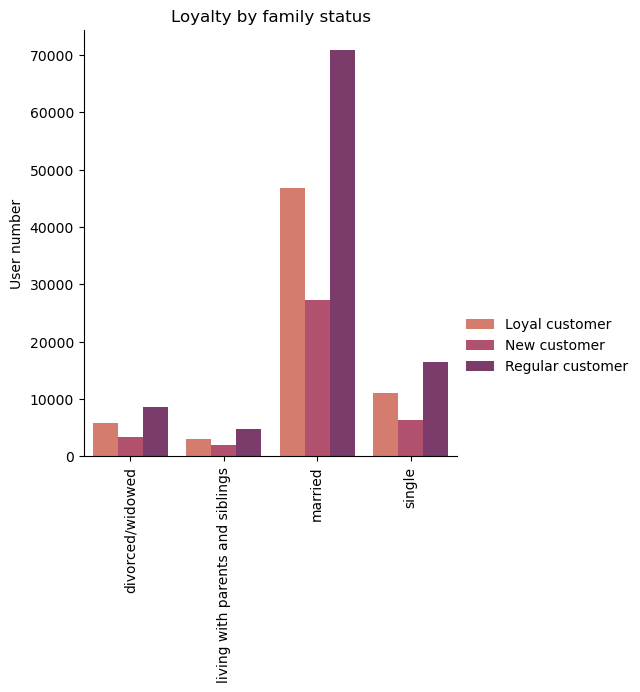

In [171]:
barchart_loyalty_family_profile = sns.catplot(data=loyalty_family_profile, kind="bar", x="family_status", y="user_id", 
                                             hue="loyalty_flag", palette="flare")
plt.title("Loyalty by family status")
barchart_loyalty_family_profile.set_axis_labels("", "User number")
barchart_loyalty_family_profile.legend.set_title("")
barchart_loyalty_family_profile.tick_params(axis='x', rotation = 90)

In [172]:
barchart_loyalty_family_profile.savefig(os.path.join(path, '04 Analysis','Visualizations', '2_barchart_loyalty_family_profile.png'))

In [173]:
spending_family_profile = df_final.groupby(['spending_flag', 'family_status'], as_index=False).agg({'user_id': 'nunique'})

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


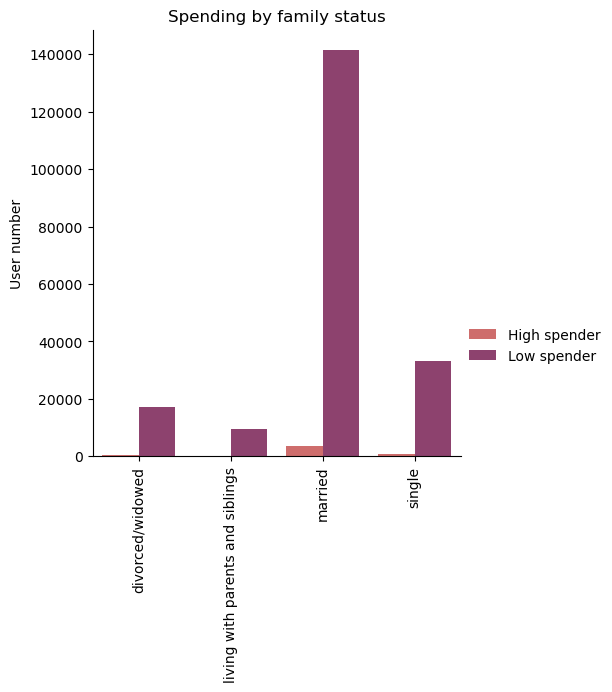

In [174]:
barchart_spending_family_profile = sns.catplot(data=spending_family_profile, kind="bar", x="family_status", y="user_id", 
                                             hue="spending_flag", palette="flare")
plt.title("Spending by family status")
barchart_spending_family_profile.set_axis_labels("", "User number")
barchart_spending_family_profile.legend.set_title("")
barchart_spending_family_profile.tick_params(axis='x', rotation = 90)

In [175]:
barchart_spending_family_profile.savefig(os.path.join(path, '04 Analysis','Visualizations', '2_barchart_spending_family_profile.png'))

Text(0.5, 0, 'Income')

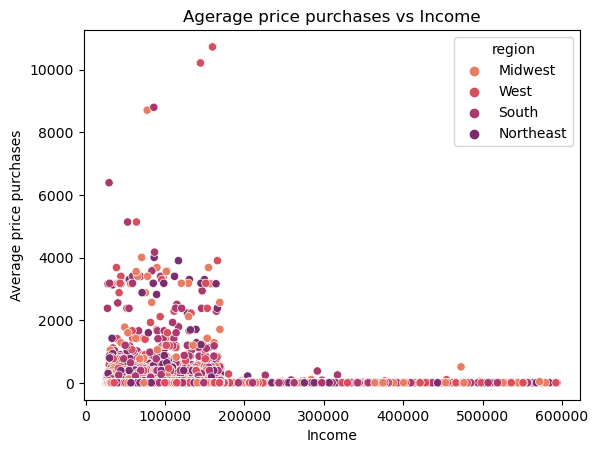

In [177]:
scatterplot_expenses_region = sns.scatterplot(data=df_final, x="income", y="avg_price_purchases", 
                                          hue="region", palette="flare")
plt.title('Agerage price purchases vs Income')
plt.ylabel('Average price purchases')
plt.xlabel('Income')

In [179]:
scatterplot_expenses_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '2_scatterplot_expenses_region.png'))

In [ ]:
# 8. Lowest market share

In [194]:
df_products_orders_barchart = df_final_with_departments.groupby(['department'], as_index=False).agg({'order_id': 'count', 'prices': 'sum'})

In [195]:
df_products_orders_barchart.sort_values(by=['order_id'], ascending=False, inplace=True)

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


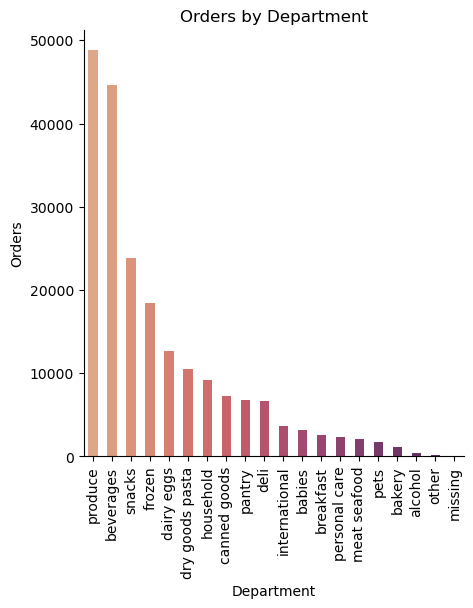

In [198]:
products_orders_barchart = sns.catplot(data=df_products_orders_barchart, kind="bar", x="department", y="order_id", 
                                         palette="flare", width = 0.5)
plt.title("Orders by Department")
products_orders_barchart.set_axis_labels("Department", "Orders")
products_orders_barchart.tick_params(axis='x', rotation=90)

In [199]:
products_orders_barchart.savefig(os.path.join(path, '04 Analysis','Visualizations', '2_products_orders_barchart.png'))